두번째 예제: CIFAR-10 사진들 분류하기 <br>
CIFAR-10 60000개의 칼라 사진, 32x32x3 <br>
10 classes<br>
each class contains 6000

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [6]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
X_train.shape

(50000, 32, 32, 3)

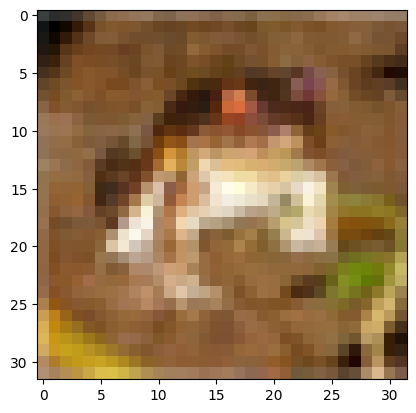

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [8]:
model=build((32, 32, 3), 10)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1606144   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                      

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 48s 153ms/step - loss: 0.8131 - accuracy: 0.7223 - val_loss: 1.0857 - val_accuracy: 0.6460
Epoch 2/10
313/313 [==============================] - 43s 137ms/step - loss: 0.7585 - accuracy: 0.7368 - val_loss: 1.1092 - val_accuracy: 0.6421
Epoch 3/10
313/313 [==============================] - 63s 202ms/step - loss: 0.7317 - accuracy: 0.7477 - val_loss: 1.0451 - val_accuracy: 0.6546
Epoch 4/10
313/313 [==============================] - 39s 123ms/step - loss: 0.7059 - accuracy: 0.7561 - val_loss: 1.0016 - val_accuracy: 0.6723
Epoch 5/10
313/313 [==============================] - 28s 91ms/step - loss: 0.6699 - accuracy: 0.7714 - val_loss: 1.0828 - val_accuracy: 0.6593
Epoch 6/10
313/313 [==============================] - 32s 102ms/step - loss: 0.6473 - accuracy: 0.7760 - val_loss: 1.1086 - val_accuracy: 0.6545
Epoch 7/10
313/313 [==============================] - 51s 162ms/step - loss: 0.6209 - accuracy: 0.7855 - val_loss: 1.0544 - val_acc

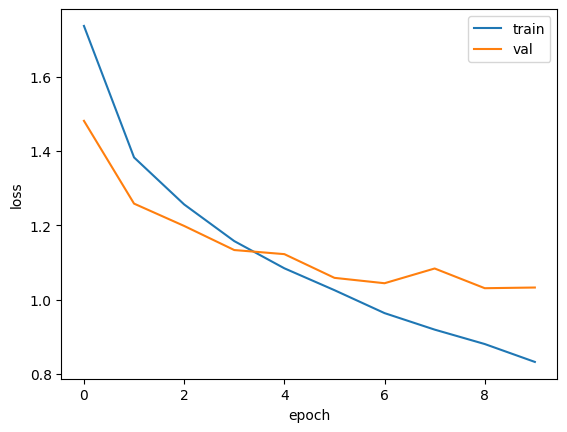

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [9]:
score = model.evaluate(X_test, y_test)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 1.0256 - accuracy: 0.6516

Test score: 1.0256433486938477
Test accuracy: 0.6516000032424927


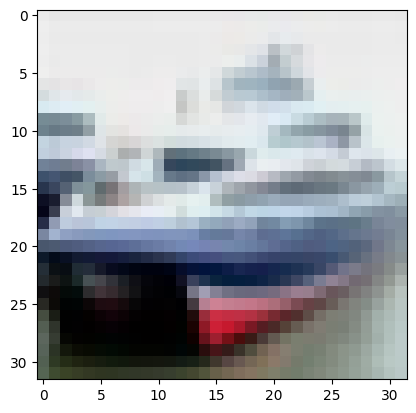

In [10]:
plt.imshow(X_test[1])
plt.show()

In [11]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
model.predict(X_test[1:2])

1/1 [==============================] - 0s 125ms/step


array([[0.010798836 , 0.7455942   , 0.0000001222, 0.0000000075,
        0.0000000341, 0.0000000001, 0.0000000182, 0.0000000001,
        0.24213213  , 0.0014746118]], dtype=float32)

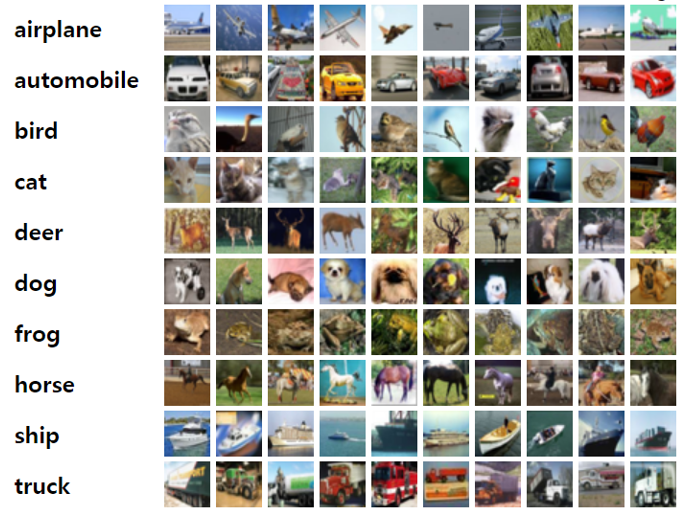